# Parallel processing

Parallel processing is a type of computing in which a program or task is divided into smaller subtasks that can be executed simultaneously on multiple processors or computing cores. This allows for faster execution times and increased efficiency in handling large amounts of data or complex calculations.

In a parallel processing system, the subtasks are distributed among the available processing units and executed concurrently. This can be done in a variety of ways, such as using multi-core processors, distributed computing networks, or graphics processing units (GPUs). The subtasks are typically independent of each other and do not require communication or synchronization between them.

Parallel processing is commonly used in scientific computing, data analysis, machine learning, and other fields where large amounts of data need to be processed quickly. However, it can also be used in everyday applications such as web servers and video game engines to improve performance and responsiveness.

Multiprocessing is a programming technique where multiple processes are created to run concurrently on a computer system. Each process has its own memory space, program counter, and stack, and can execute independently of the other processes.

In contrast to parallel processing, which typically refers to using multiple cores or processors on a single machine, multiprocessing can involve running multiple processes on a single or multiple machines, and can utilize both multi-core CPUs and distributed computing systems.

A process pool is a technique used in concurrent programming to manage a group of worker processes that can be used to perform tasks in parallel. The idea behind a process pool is to create a pool of worker processes that are ready to receive tasks from a queue. When a new task is submitted to the pool, one of the available workers picks up the task, executes it, and returns the result.

Process pools are commonly used in situations where a large number of tasks need to be executed concurrently, and the overhead of creating and managing individual processes for each task would be too high. By using a pool of pre-created worker processes, the system can avoid the overhead of process creation and destruction, and can achieve higher levels of concurrency.


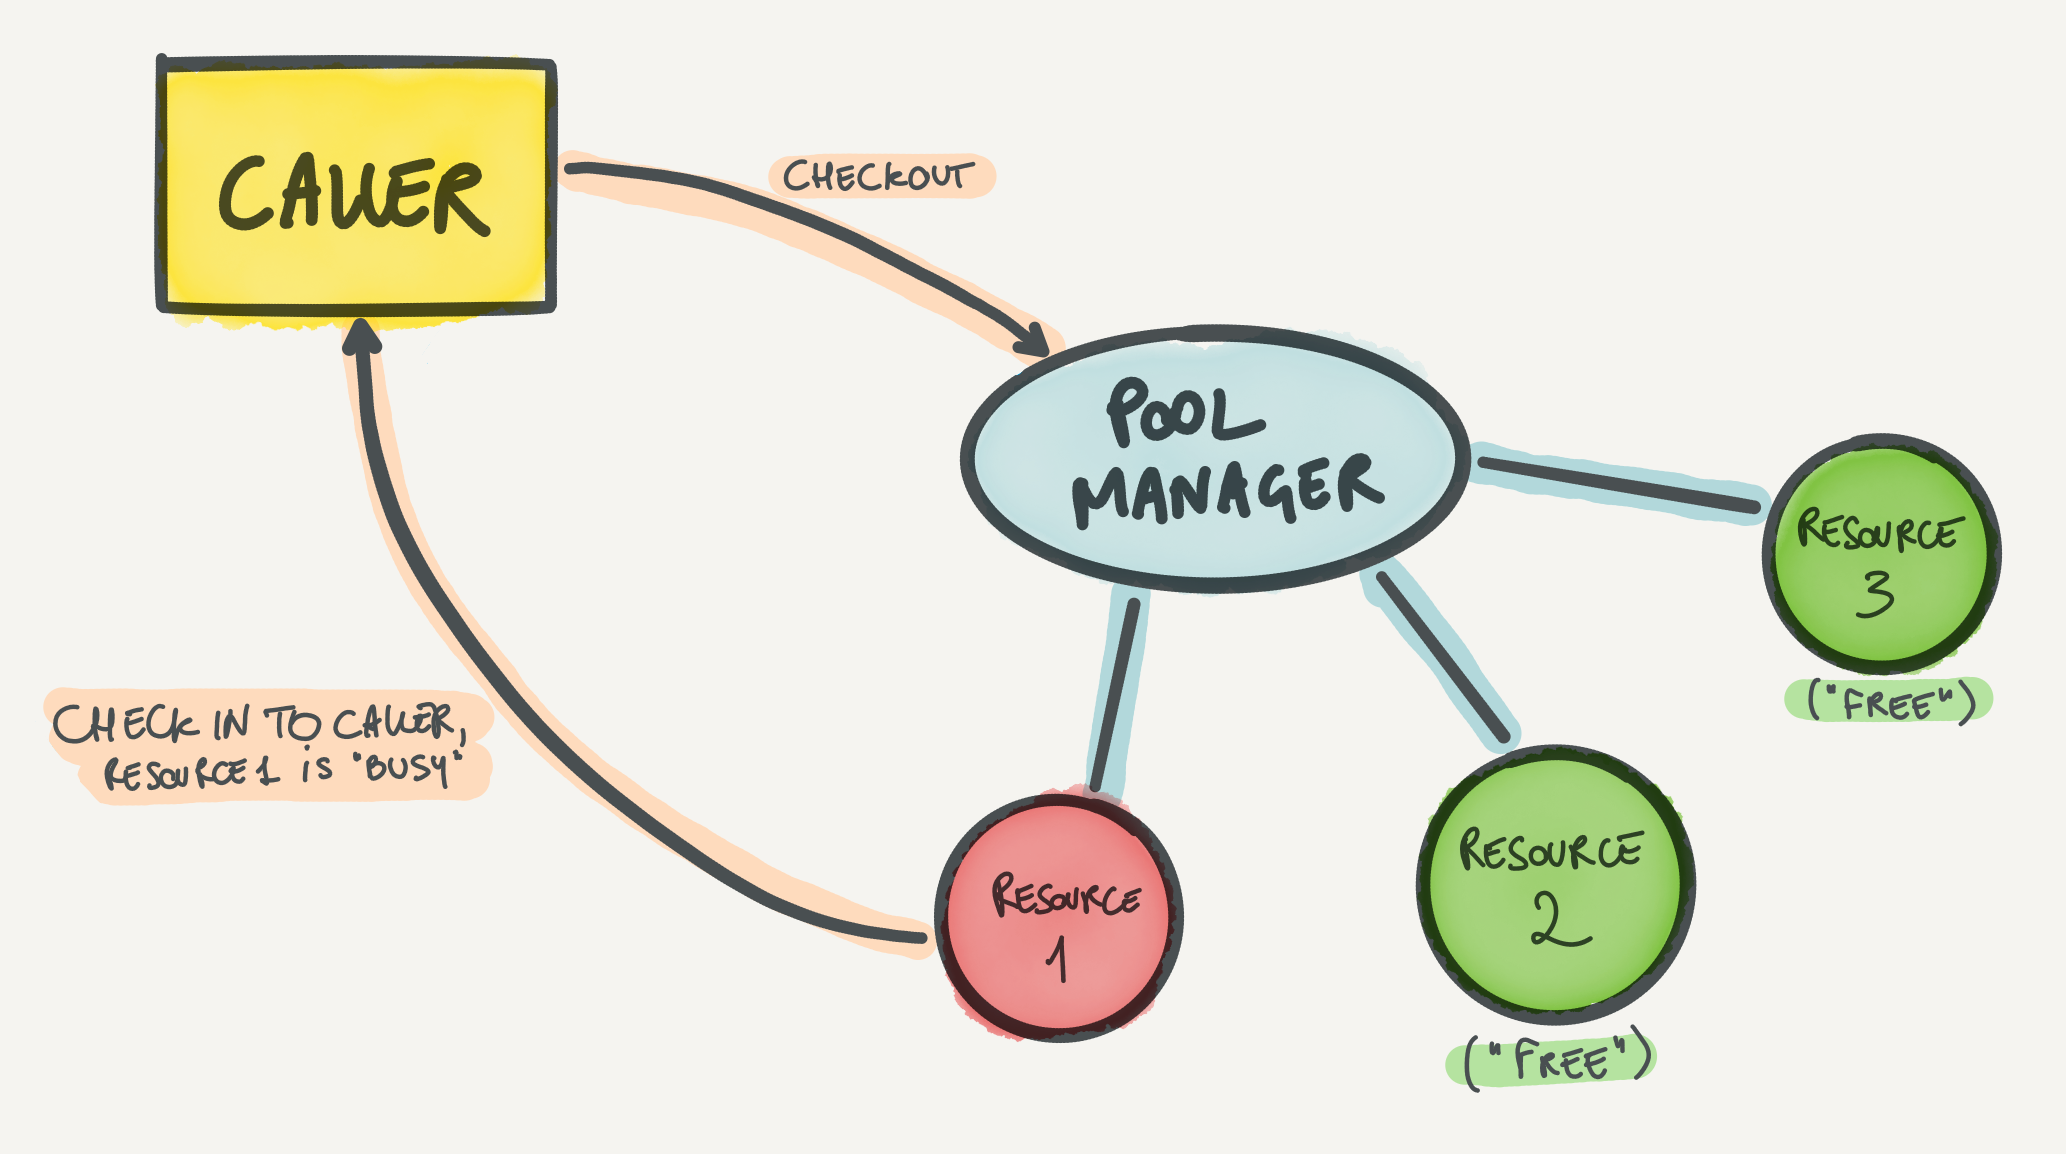

First calculating mean and standard deviation of an exoplanet dataset for two selected columns: mass and radius. Also printing the time taken for the entire computation.

In [1]:
import pandas as pd
import numpy as np
import time
import sys



# define function to calculate mean and standard deviation for selected columns
def calculate_stats(data, columns):
    # select columns of interest
    subset = data[columns]
    # calculate mean and standard deviation for each column
    means = np.mean(subset, axis=0)
    stds = np.std(subset, axis=0)
    # return results as dictionary
    return {"means": means, "stds": stds}

#if __name__ == '__main__':
#this is a condition for executing the code only when the python script is run directly from the command line and not imported as a module.
if not hasattr(sys, 'argv') or any(arg.endswith('.py') for arg in sys.argv):
    # read exoplanet dataset from CSV file
    data = pd.read_csv("/home/sreeparna/belgrade/astrobio/naive_bayes/training.csv")

    # specify columns of interest
    columns = ['pl_bmasse', 'pl_rade']

    # start timer
    start_time = time.time()
    # The time.time() function returns the current time in seconds as a floating-point number.

    # calculate mean and standard deviation for selected columns
    final_stats = calculate_stats(data, columns)

    # print the final statistics
    print(final_stats)

    # calculate and print the total time taken for the operation
    end_time = time.time()
    print("Time taken:", end_time - start_time, "seconds")


{'means': pl_bmasse    410.026281
pl_rade       10.804268
dtype: float64, 'stds': pl_bmasse    998.757295
pl_rade        5.625902
dtype: float64}
Time taken: 0.0015716552734375 seconds


Now, calculating mean and standard deviation of the same two columns of the above dataset by using parallel processing and printing the time taken for the entire computation.

In [2]:
import pandas as pd
import numpy as np
import multiprocessing

# define function to calculate mean and standard deviation for selected columns
def calc_mean_std(data, columns):
    # select columns of interest
    subset = data[columns]
    # calculate mean and standard deviation for each column
    means = np.mean(subset, axis=0)
    stds = np.std(subset, axis=0)
    # return results as dictionary
    return {"means": means, "stds": stds}

if __name__ == "__main__":
    # read exoplanet dataset from CSV file
    data = pd.read_csv("/home/sreeparna/belgrade/astrobio/naive_bayes/training.csv")

    # specify columns of interest
    columns = ['pl_bmasse', 'pl_rade']
    
    start_time = time.time()

    # create multiprocessing pool with four processors
    with multiprocessing.Pool(processes=4) as pool:
        # calculate mean and standard deviation for selected columns using the pool
        results = pool.apply(calc_mean_std, args=(data, columns))
        
    end_time = time.time()
    print("Time taken:", end_time - start_time, "seconds")

    # print results
    print("Means:")
    print(results["means"])
    print("Standard Deviations:")
    print(results["stds"])


Time taken: 0.03716444969177246 seconds
Means:
pl_bmasse    410.026281
pl_rade       10.804268
dtype: float64
Standard Deviations:
pl_bmasse    998.757295
pl_rade        5.625902
dtype: float64


We see that time taken for computation without using parallel processing is less which should not be the case. Computation using parallel processing is supposed to take much less time. 

There are several reasons why the parallel processing code may not be faster than the serial code:

    The overhead of multiprocessing: Creating and managing multiple processes has overhead, which means that there is a certain amount of time required to start and stop each process, communicate between processes, and manage the shared memory. If the amount of work to be done in each process is relatively small, the overhead of multiprocessing may outweigh the benefits.

    The size of the dataset: If the dataset is relatively small, the benefits of parallel processing may not be significant. In the example above, the dataset is read from a CSV file, which can be a relatively slow operation. However, once the data is loaded into memory, the calculation of the mean and standard deviation may be relatively fast, and parallel processing may not provide much benefit.

    The number of available processors: The multiprocessing.Pool object is created with four processes in the example above. If the system has fewer than four processors, or if other processes are competing for CPU time, the benefits of parallel processing may be limited.

    The nature of the calculation: Some calculations are inherently difficult to parallelize. In the example above, the calculation of the mean and standard deviation for each column is relatively simple and can be parallelized easily. However, if the calculation involves complex interdependencies between data elements, parallel processing may not be effective.